### AdaBoost（adaptive boosting 自适应boosting）的一般流程  
### （1）收集数据：可以使用任意方法收集数据
### （2）准备数据：依赖于所使用的弱分类器类型，使用单层决策树，这种分类器可用处理任何数据类型。作为弱分类器，简单分类器的效果更好
### （3）分析数据：可用使用任意方法
### （4）训练算法：AdaBoost的大部分时间都在训练上，分类器将多次在同一数据集上训练弱分类器。
### （5）测试算法：计算分类的错误率
### （6）使用算法：同SVM一样，AdaBoost预测两个类别中的一个。如果想把它应用大多个类别场合，那么就要像多类SVM中的做法一样对AdaBoost进行修改

In [41]:
#https://blog.csdn.net/zhongshijunacm/article/details/52070722 本帖子中讲的公式与代码对应
from numpy import *

def loadSimpData():
    datMat = matrix(
            [[ 1. , 2.1],
             [ 2. , 1.1],
             [ 1.3, 1. ],
             [ 1. , 1. ],
             [ 2. , 1. ]])
    classLabels = [1.0 , 1.0, -1.0, -1.0, 1.0]
    return datMat, classLabels

datMat,classLabels = loadSimpData()


In [42]:
print(datMat)

[[ 1.   2.1]
 [ 2.   1.1]
 [ 1.3  1. ]
 [ 1.   1. ]
 [ 2.   1. ]]


In [43]:
print(classLabels)

[1.0, 1.0, -1.0, -1.0, 1.0]


### 基于单层决策树构建弱分类器的伪代码
####  将最小错误率minError设为+ $ \infty $
####  对数据集中的每一个特征（第一层循环）：
####  &emsp;&emsp;对每个步长（第二层循环）：
#### &emsp;&emsp; &emsp;&emsp; 对每个不等号（第三层循环）：
#### &emsp;&emsp; &emsp;&emsp;&emsp;&emsp; 建立一棵单层决策树并利用加权数据集对它进行测试：
#### &emsp;&emsp; &emsp;&emsp;&emsp;&emsp; 将如果错误率低于minError，则将当前单层决策树设为最佳单层决策树
#### &emsp;&emsp; 返回最佳单层决策树

In [44]:
 math.log(0.97/0.03)  #测试 错误率低 a值更大，错误率高 a值更小

3.4760986898352733

In [45]:
math.log(0.95/0.05)

2.9444389791664403

In [46]:
math.log(0.95/0.05)

2.9444389791664403

### 程序清单7-1  单层决策树生成函数

In [47]:
def stumpClassify(dataMatrix,dimen,threshVal,threshIneq):
    retArray = ones((shape(dataMatrix)[0],1)) #初始化
    if threshIneq =='lt':#判断是大于号还是小于号
        retArray[dataMatrix[:,dimen] <= threshVal] = -1.0  #这是mat数值类型的特殊功能，不是返回bool型。而是满足条件的数据
    else:
        retArray[dataMatrix[:,dimen] > threshVal] = -1.0
    return retArray

In [88]:
#@param dataArr: 输入数据集
#@param classLabels: 输入数据集的类标签
#@param D: 样本权值
#@return: 建立成功的决策树
def buildStump(dataArr,classLabels,D):
    #首先转化为矩阵形式，便于矩阵的计算
    dataMatrix = mat(dataArr);labelMat = mat(classLabels).T
    m,n = shape(dataMatrix)
    numSteps = 10.0 #每次向前移动的步长；即，每次迭代的大小
    bestStump = {}#每次向前移动的步长；即，每次迭代的大小
    bestClasEst = mat(zeros((m,1)))
    minError = inf
    for i in range(n):#特征的循环，第一个还是第二个特征，只能为单特征
        rangeMin = dataMatrix[:,i].min();rangeMax = dataMatrix[:,i].max()
        print(rangeMin)
        print(rangeMax)
        stepSize = (rangeMax - rangeMin)/numSteps #从前一个索引到下一个索引的跨度
        print(stepSize)
        for j in range(-1,int(numSteps)+1):
            for inequal in ['lt','gt']:
                print(j)
                threshVal = (rangeMin + float(j) * stepSize)
                print(threshVal)
                
                predictedVals = stumpClassify(dataMatrix,i,threshVal,inequal)
                errArr = mat(ones((m,1)))#错误数组
                errArr [predictedVals == labelMat] = 0 #如果是已经正确分类，则下次减小样本权值
                weightedError = D.T*errArr #这里的error是错误向量errArr和权重向量D的相应元素相乘得到的即加权错误率  
                print("split:dim %d,thresh %.2f,thresh inequal: %s,the weighted error is %.3f" % (i,threshVal,inequal,weightedError))
                if weightedError < minError:
                    minError = weightedError
                    bestClasEst = predictedVals.copy() #最优决策树对应的类标签
                    bestStump['dim'] = i
                    bestStump['thresh'] = threshVal
                    bestStump['ineq'] = inequal
    return bestStump,minError,bestClasEst

In [89]:
D = mat(ones((5,1))/5)

In [90]:
print(D)

[[ 0.2]
 [ 0.2]
 [ 0.2]
 [ 0.2]
 [ 0.2]]


In [91]:
buildStump(datMat,classLabels,D)

1.0
2.0
0.1
-1
0.9
split:dim 0,thresh 0.90,thresh inequal: lt,the weighted error is 0.400
-1
0.9
split:dim 0,thresh 0.90,thresh inequal: gt,the weighted error is 0.600
0
1.0
split:dim 0,thresh 1.00,thresh inequal: lt,the weighted error is 0.400
0
1.0
split:dim 0,thresh 1.00,thresh inequal: gt,the weighted error is 0.600
1
1.1
split:dim 0,thresh 1.10,thresh inequal: lt,the weighted error is 0.400
1
1.1
split:dim 0,thresh 1.10,thresh inequal: gt,the weighted error is 0.600
2
1.2
split:dim 0,thresh 1.20,thresh inequal: lt,the weighted error is 0.400
2
1.2
split:dim 0,thresh 1.20,thresh inequal: gt,the weighted error is 0.600
3
1.3
split:dim 0,thresh 1.30,thresh inequal: lt,the weighted error is 0.200
3
1.3
split:dim 0,thresh 1.30,thresh inequal: gt,the weighted error is 0.800
4
1.4
split:dim 0,thresh 1.40,thresh inequal: lt,the weighted error is 0.200
4
1.4
split:dim 0,thresh 1.40,thresh inequal: gt,the weighted error is 0.800
5
1.5
split:dim 0,thresh 1.50,thresh inequal: lt,the weighted 

({'dim': 0, 'ineq': 'lt', 'thresh': 1.3}, matrix([[ 0.2]]), array([[-1.],
        [ 1.],
        [-1.],
        [-1.],
        [ 1.]]))

### 完整AdaBoost算法的伪代码
####  对每次迭代
####  &emsp;&emsp;利用buildStump()函数找到最佳单层决策树
#### &emsp;&emsp; 将最佳单层决策树叫人到单层决策树组
#### &emsp;&emsp; 计算alpha值
#### &emsp;&emsp; 计算新的权重向量D
#### &emsp;&emsp; 更新累计类别估计值
#### &emsp;&emsp; 如果错误率等于0.0，则退出循环

### 程序清单7-2  基于单层决策树的AdaBoost训练过程

In [92]:
def adaBoostTrainDS(dataArr,classLabels,numIt = 40):
    weakClassArr = []
    m = shape(dataArr)[0]
    D = mat(ones((m,1))/m)
    aggClassEst = mat(zeros((m,1)))
    for i in range(numIt):
        bestStump,error,classEst = buildStump(dataArr,classLabels,D)
        print("D:",D.T)
        alpha = float(0.5 * log((1.0-error)/max(error,1e-16)))
        bestStump['alpah'] = alpha
        weakClassArr.append(bestStump)
        print("classEst：",classEst.T)
        print(classLabels)
        print("classLabels：",-1*alpha*mat(classLabels).T)        
        expon = multiply(-1*alpha*mat(classLabels).T,classEst)
        print("expon：",exp(expon))
        print("shapeD",shape(D))
        print("shapeE",shape(exp(expon)))
        D = multiply(D,exp(expon))
        print(D)
        D = D/D.sum()
        aggClassEst += alpha * classEst
        print("aggClassEst:",aggClassEst.T)
        aggErrors = multiply(sign(aggClassEst) != mat(classLabels).T,ones((m,1)))
        errorRate = aggErrors.sum()/m
        print("total Error:",errorRate,"\n")
        if errorRate == 0.0: break
    return weakClassArr
classifyArray = adaBoostTrainDS(datMat,classLabels,9)

1.0
2.0
0.1
-1
0.9
split:dim 0,thresh 0.90,thresh inequal: lt,the weighted error is 0.400
-1
0.9
split:dim 0,thresh 0.90,thresh inequal: gt,the weighted error is 0.600
0
1.0
split:dim 0,thresh 1.00,thresh inequal: lt,the weighted error is 0.400
0
1.0
split:dim 0,thresh 1.00,thresh inequal: gt,the weighted error is 0.600
1
1.1
split:dim 0,thresh 1.10,thresh inequal: lt,the weighted error is 0.400
1
1.1
split:dim 0,thresh 1.10,thresh inequal: gt,the weighted error is 0.600
2
1.2
split:dim 0,thresh 1.20,thresh inequal: lt,the weighted error is 0.400
2
1.2
split:dim 0,thresh 1.20,thresh inequal: gt,the weighted error is 0.600
3
1.3
split:dim 0,thresh 1.30,thresh inequal: lt,the weighted error is 0.200
3
1.3
split:dim 0,thresh 1.30,thresh inequal: gt,the weighted error is 0.800
4
1.4
split:dim 0,thresh 1.40,thresh inequal: lt,the weighted error is 0.200
4
1.4
split:dim 0,thresh 1.40,thresh inequal: gt,the weighted error is 0.800
5
1.5
split:dim 0,thresh 1.50,thresh inequal: lt,the weighted 

In [93]:
def adaBoostTrainDS(dataArr,classLabels,numIt = 40):
    weakClassArr = []  #用于存储每次训练得到的弱分类器以及其输出结果的权重
    m = shape(dataArr)[0]
    D = mat(ones((m,1))/m) #数据集权重初始化为1/m
    aggClassEst = mat(zeros((m,1)))#记录每个数据点的类别估计累计值
    for i in range(numIt):
        bestStump,error,classEst = buildStump(dataArr,classLabels,D)#在加权数据集里面寻找最低错误率的单层决策树
        print("D:",D.T)
        alpha = float(0.5 * log((1.0-error)/max(error,1e-16))) 
        #根据错误率计算出本次单层决策树输出结果的权重 max(error,1e-16)则是为了确保error为0时不会出现除0溢出
        #注意代码中的一个技巧max(error,le-16)用于确保在没有错误时不会发生除零溢出
        bestStump['alpha'] = alpha #记录权重
        weakClassArr.append(bestStump)
        print("classEst：",classEst.T)
        print(classLabels)
        print("classLabels：",-1*alpha*mat(classLabels).T)  
        #计算下一次迭代中的权重向量D
        # 不明白expon为什么这样计算
        expon = multiply(-1*alpha*mat(classLabels).T,classEst)#计算指数，#乘法用于区分是否正确或者错误样本
        print("expon：",exp(expon))
        print("shapeD",shape(D))
        print("shapeE",shape(exp(expon)))
        D = multiply(D,exp(expon))
        print(D)            
        D = D/D.sum()#归一化
        aggClassEst += alpha * classEst  #错误率累加计算
        print("aggClassEst:",aggClassEst.T)
        #sign(aggClassEst)表示根据aggClassEst的正负号分别标记为1 -1
        aggErrors = multiply(sign(aggClassEst) != mat(classLabels).T,ones((m,1)))
        errorRate = aggErrors.sum()/m
        print("total Error:",errorRate,"\n")
        if errorRate == 0.0: break#如果错误率为0那就提前结束for循环
    return weakClassArr,aggClassEst
classifyArray,aggClassEst = adaBoostTrainDS(datMat,classLabels,9)

1.0
2.0
0.1
-1
0.9
split:dim 0,thresh 0.90,thresh inequal: lt,the weighted error is 0.400
-1
0.9
split:dim 0,thresh 0.90,thresh inequal: gt,the weighted error is 0.600
0
1.0
split:dim 0,thresh 1.00,thresh inequal: lt,the weighted error is 0.400
0
1.0
split:dim 0,thresh 1.00,thresh inequal: gt,the weighted error is 0.600
1
1.1
split:dim 0,thresh 1.10,thresh inequal: lt,the weighted error is 0.400
1
1.1
split:dim 0,thresh 1.10,thresh inequal: gt,the weighted error is 0.600
2
1.2
split:dim 0,thresh 1.20,thresh inequal: lt,the weighted error is 0.400
2
1.2
split:dim 0,thresh 1.20,thresh inequal: gt,the weighted error is 0.600
3
1.3
split:dim 0,thresh 1.30,thresh inequal: lt,the weighted error is 0.200
3
1.3
split:dim 0,thresh 1.30,thresh inequal: gt,the weighted error is 0.800
4
1.4
split:dim 0,thresh 1.40,thresh inequal: lt,the weighted error is 0.200
4
1.4
split:dim 0,thresh 1.40,thresh inequal: gt,the weighted error is 0.800
5
1.5
split:dim 0,thresh 1.50,thresh inequal: lt,the weighted 

In [94]:
classifyArray

[{'alpha': 0.6931471805599453, 'dim': 0, 'ineq': 'lt', 'thresh': 1.3},
 {'alpha': 0.9729550745276565, 'dim': 1, 'ineq': 'lt', 'thresh': 1.0},
 {'alpha': 0.8958797346140273,
  'dim': 0,
  'ineq': 'lt',
  'thresh': 0.90000000000000002}]

### 程序清单7-3  AdoBoost分类函数

In [95]:
def adaClassify(datToClass,classifierArr):
    dataMatrix = mat(datToClass)
    m = shape(dataMatrix)[0]
    aggClassEst = mat(zeros((m,1)))
    for i in range(len(classifierArr)):
        classEst = stumpClassify(dataMatrix,classifierArr[i]['dim'],classifierArr[i]['thresh'],classifierArr[i]['ineq'])
        aggClassEst += classifierArr[i]['alpha']*classEst
        print(aggClassEst)
    return sign(aggClassEst)

In [96]:
datArr,labelArr = loadSimpData()
classifierArr,aggClassEst = adaBoostTrainDS(datArr,labelArr,30)

1.0
2.0
0.1
-1
0.9
split:dim 0,thresh 0.90,thresh inequal: lt,the weighted error is 0.400
-1
0.9
split:dim 0,thresh 0.90,thresh inequal: gt,the weighted error is 0.600
0
1.0
split:dim 0,thresh 1.00,thresh inequal: lt,the weighted error is 0.400
0
1.0
split:dim 0,thresh 1.00,thresh inequal: gt,the weighted error is 0.600
1
1.1
split:dim 0,thresh 1.10,thresh inequal: lt,the weighted error is 0.400
1
1.1
split:dim 0,thresh 1.10,thresh inequal: gt,the weighted error is 0.600
2
1.2
split:dim 0,thresh 1.20,thresh inequal: lt,the weighted error is 0.400
2
1.2
split:dim 0,thresh 1.20,thresh inequal: gt,the weighted error is 0.600
3
1.3
split:dim 0,thresh 1.30,thresh inequal: lt,the weighted error is 0.200
3
1.3
split:dim 0,thresh 1.30,thresh inequal: gt,the weighted error is 0.800
4
1.4
split:dim 0,thresh 1.40,thresh inequal: lt,the weighted error is 0.200
4
1.4
split:dim 0,thresh 1.40,thresh inequal: gt,the weighted error is 0.800
5
1.5
split:dim 0,thresh 1.50,thresh inequal: lt,the weighted 

In [97]:
adaClassify([0,0],classifierArr)

[[-0.69314718]]
[[-1.66610226]]
[[-2.56198199]]


matrix([[-1.]])

### 程序清单7-4 自适应数据加载函数

In [98]:
# 自适应数据加载函数
def loadDataSet(fileName):
#函数能够自检出特征的数目
    numFeat = len(open(fileName).readline().split('\t'))
    dataMat = []; labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr = []
        curLine = line.strip().split('\t')
        for i in range(numFeat - 1):
            lineArr.append(float(curLine[i]))
        dataMat.append(lineArr)
        labelMat.append(float(curLine[-1]))
    return dataMat, labelMat


In [99]:
datArr,labelArr = loadDataSet('horseColicTraining2.txt')
classifierArray = adaBoostTrainDS(datArr,labelArr,10)

testArr,testLabelArr = loadDataSet('horseColicTest2.txt')
prediction10 = adaClassify(testArr,classifierArray)
errArr = mat(ones((67,1)))
su = errArr[prediction10 != mat(testLabelArr).T].sum()
print(su)

1.0
2.0
0.1
-1
0.9
split:dim 0,thresh 0.90,thresh inequal: lt,the weighted error is 0.405
-1
0.9
split:dim 0,thresh 0.90,thresh inequal: gt,the weighted error is 0.595
0
1.0
split:dim 0,thresh 1.00,thresh inequal: lt,the weighted error is 0.438
0
1.0
split:dim 0,thresh 1.00,thresh inequal: gt,the weighted error is 0.562
1
1.1
split:dim 0,thresh 1.10,thresh inequal: lt,the weighted error is 0.438
1
1.1
split:dim 0,thresh 1.10,thresh inequal: gt,the weighted error is 0.562
2
1.2
split:dim 0,thresh 1.20,thresh inequal: lt,the weighted error is 0.438
2
1.2
split:dim 0,thresh 1.20,thresh inequal: gt,the weighted error is 0.562
3
1.3
split:dim 0,thresh 1.30,thresh inequal: lt,the weighted error is 0.438
3
1.3
split:dim 0,thresh 1.30,thresh inequal: gt,the weighted error is 0.562
4
1.4
split:dim 0,thresh 1.40,thresh inequal: lt,the weighted error is 0.438
4
1.4
split:dim 0,thresh 1.40,thresh inequal: gt,the weighted error is 0.562
5
1.5
split:dim 0,thresh 1.50,thresh inequal: lt,the weighted 

-0.5
split:dim 9,thresh -0.50,thresh inequal: lt,the weighted error is 0.405
-1
-0.5
split:dim 9,thresh -0.50,thresh inequal: gt,the weighted error is 0.595
0
0.0
split:dim 9,thresh 0.00,thresh inequal: lt,the weighted error is 0.448
0
0.0
split:dim 9,thresh 0.00,thresh inequal: gt,the weighted error is 0.552
1
0.5
split:dim 9,thresh 0.50,thresh inequal: lt,the weighted error is 0.448
1
0.5
split:dim 9,thresh 0.50,thresh inequal: gt,the weighted error is 0.552
2
1.0
split:dim 9,thresh 1.00,thresh inequal: lt,the weighted error is 0.555
2
1.0
split:dim 9,thresh 1.00,thresh inequal: gt,the weighted error is 0.445
3
1.5
split:dim 9,thresh 1.50,thresh inequal: lt,the weighted error is 0.555
3
1.5
split:dim 9,thresh 1.50,thresh inequal: gt,the weighted error is 0.445
4
2.0
split:dim 9,thresh 2.00,thresh inequal: lt,the weighted error is 0.579
4
2.0
split:dim 9,thresh 2.00,thresh inequal: gt,the weighted error is 0.421
5
2.5
split:dim 9,thresh 2.50,thresh inequal: lt,the weighted error is 0.

0.6
-1
-0.6
split:dim 7,thresh -0.60,thresh inequal: lt,the weighted error is 0.506
-1
-0.6
split:dim 7,thresh -0.60,thresh inequal: gt,the weighted error is 0.494
0
0.0
split:dim 7,thresh 0.00,thresh inequal: lt,the weighted error is 0.488
0
0.0
split:dim 7,thresh 0.00,thresh inequal: gt,the weighted error is 0.512
1
0.6
split:dim 7,thresh 0.60,thresh inequal: lt,the weighted error is 0.488
1
0.6
split:dim 7,thresh 0.60,thresh inequal: gt,the weighted error is 0.512
2
1.2
split:dim 7,thresh 1.20,thresh inequal: lt,the weighted error is 0.611
2
1.2
split:dim 7,thresh 1.20,thresh inequal: gt,the weighted error is 0.389
3
1.8
split:dim 7,thresh 1.80,thresh inequal: lt,the weighted error is 0.611
3
1.8
split:dim 7,thresh 1.80,thresh inequal: gt,the weighted error is 0.389
4
2.4
split:dim 7,thresh 2.40,thresh inequal: lt,the weighted error is 0.609
4
2.4
split:dim 7,thresh 2.40,thresh inequal: gt,the weighted error is 0.391
5
3.0
split:dim 7,thresh 3.00,thresh inequal: lt,the weighted erro

9.6
-1
-9.6
split:dim 4,thresh -9.60,thresh inequal: lt,the weighted error is 0.593
-1
-9.6
split:dim 4,thresh -9.60,thresh inequal: gt,the weighted error is 0.407
0
0.0
split:dim 4,thresh 0.00,thresh inequal: lt,the weighted error is 0.541
0
0.0
split:dim 4,thresh 0.00,thresh inequal: gt,the weighted error is 0.459
1
9.6
split:dim 4,thresh 9.60,thresh inequal: lt,the weighted error is 0.546
1
9.6
split:dim 4,thresh 9.60,thresh inequal: gt,the weighted error is 0.454
2
19.2
split:dim 4,thresh 19.20,thresh inequal: lt,the weighted error is 0.562
2
19.2
split:dim 4,thresh 19.20,thresh inequal: gt,the weighted error is 0.438
3
28.8
split:dim 4,thresh 28.80,thresh inequal: lt,the weighted error is 0.464
3
28.8
split:dim 4,thresh 28.80,thresh inequal: gt,the weighted error is 0.536
4
38.4
split:dim 4,thresh 38.40,thresh inequal: lt,the weighted error is 0.447
4
38.4
split:dim 4,thresh 38.40,thresh inequal: gt,the weighted error is 0.553
5
48.0
split:dim 4,thresh 48.00,thresh inequal: lt,the

shapeE (299, 1)
[[ 0.0025152 ]
 [ 0.00633239]
 [ 0.00134634]
 [ 0.00633239]
 [ 0.0033896 ]
 [ 0.00134634]
 [ 0.00134634]
 [ 0.00633239]
 [ 0.0025152 ]
 [ 0.00601546]
 [ 0.00238932]
 [ 0.00238932]
 [ 0.00134634]
 [ 0.00633239]
 [ 0.00238932]
 [ 0.0025152 ]
 [ 0.00134634]
 [ 0.00134634]
 [ 0.00238932]
 [ 0.00446368]
 [ 0.00601546]
 [ 0.00134634]
 [ 0.00134634]
 [ 0.00238932]
 [ 0.00238932]
 [ 0.00238932]
 [ 0.00238932]
 [ 0.00134634]
 [ 0.01123796]
 [ 0.00134634]
 [ 0.00134634]
 [ 0.00633239]
 [ 0.00238932]
 [ 0.00238932]
 [ 0.00601546]
 [ 0.00134634]
 [ 0.00633239]
 [ 0.01123796]
 [ 0.00134634]
 [ 0.00633239]
 [ 0.00134634]
 [ 0.00238932]
 [ 0.00238932]
 [ 0.0025152 ]
 [ 0.00134634]
 [ 0.00134634]
 [ 0.01123796]
 [ 0.00134634]
 [ 0.0033896 ]
 [ 0.00134634]
 [ 0.00134634]
 [ 0.00633239]
 [ 0.00134634]
 [ 0.00134634]
 [ 0.0033896 ]
 [ 0.00633239]
 [ 0.00134634]
 [ 0.0025152 ]
 [ 0.00238932]
 [ 0.00134634]
 [ 0.00134634]
 [ 0.00238932]
 [ 0.0033896 ]
 [ 0.0033896 ]
 [ 0.00238932]
 [ 0.0023

0.0
split:dim 20,thresh 0.00,thresh inequal: lt,the weighted error is 0.505
0
0.0
split:dim 20,thresh 0.00,thresh inequal: gt,the weighted error is 0.495
1
1.01
split:dim 20,thresh 1.01,thresh inequal: lt,the weighted error is 0.506
1
1.01
split:dim 20,thresh 1.01,thresh inequal: gt,the weighted error is 0.494
2
2.02
split:dim 20,thresh 2.02,thresh inequal: lt,the weighted error is 0.494
2
2.02
split:dim 20,thresh 2.02,thresh inequal: gt,the weighted error is 0.506
3
3.03
split:dim 20,thresh 3.03,thresh inequal: lt,the weighted error is 0.498
3
3.03
split:dim 20,thresh 3.03,thresh inequal: gt,the weighted error is 0.502
4
4.04
split:dim 20,thresh 4.04,thresh inequal: lt,the weighted error is 0.474
4
4.04
split:dim 20,thresh 4.04,thresh inequal: gt,the weighted error is 0.526
5
5.05
split:dim 20,thresh 5.05,thresh inequal: lt,the weighted error is 0.466
5
5.05
split:dim 20,thresh 5.05,thresh inequal: gt,the weighted error is 0.534
6
6.06
split:dim 20,thresh 6.06,thresh inequal: lt,the w

45.0
split:dim 17,thresh 45.00,thresh inequal: gt,the weighted error is 0.480
7
52.5
split:dim 17,thresh 52.50,thresh inequal: lt,the weighted error is 0.551
7
52.5
split:dim 17,thresh 52.50,thresh inequal: gt,the weighted error is 0.449
8
60.0
split:dim 17,thresh 60.00,thresh inequal: lt,the weighted error is 0.554
8
60.0
split:dim 17,thresh 60.00,thresh inequal: gt,the weighted error is 0.446
9
67.5
split:dim 17,thresh 67.50,thresh inequal: lt,the weighted error is 0.535
9
67.5
split:dim 17,thresh 67.50,thresh inequal: gt,the weighted error is 0.465
10
75.0
split:dim 17,thresh 75.00,thresh inequal: lt,the weighted error is 0.526
10
75.0
split:dim 17,thresh 75.00,thresh inequal: gt,the weighted error is 0.474
0.0
89.0
8.9
-1
-8.9
split:dim 18,thresh -8.90,thresh inequal: lt,the weighted error is 0.474
-1
-8.9
split:dim 18,thresh -8.90,thresh inequal: gt,the weighted error is 0.526
0
0.0
split:dim 18,thresh 0.00,thresh inequal: lt,the weighted error is 0.434
0
0.0
split:dim 18,thresh 0

8
4.0
split:dim 16,thresh 4.00,thresh inequal: gt,the weighted error is 0.448
9
4.5
split:dim 16,thresh 4.50,thresh inequal: lt,the weighted error is 0.552
9
4.5
split:dim 16,thresh 4.50,thresh inequal: gt,the weighted error is 0.448
10
5.0
split:dim 16,thresh 5.00,thresh inequal: lt,the weighted error is 0.462
10
5.0
split:dim 16,thresh 5.00,thresh inequal: gt,the weighted error is 0.538
0.0
75.0
7.5
-1
-7.5
split:dim 17,thresh -7.50,thresh inequal: lt,the weighted error is 0.538
-1
-7.5
split:dim 17,thresh -7.50,thresh inequal: gt,the weighted error is 0.462
0
0.0
split:dim 17,thresh 0.00,thresh inequal: lt,the weighted error is 0.491
0
0.0
split:dim 17,thresh 0.00,thresh inequal: gt,the weighted error is 0.509
1
7.5
split:dim 17,thresh 7.50,thresh inequal: lt,the weighted error is 0.491
1
7.5
split:dim 17,thresh 7.50,thresh inequal: gt,the weighted error is 0.509
2
15.0
split:dim 17,thresh 15.00,thresh inequal: lt,the weighted error is 0.491
2
15.0
split:dim 17,thresh 15.00,thresh i

split:dim 16,thresh 2.00,thresh inequal: gt,the weighted error is 0.467
5
2.5
split:dim 16,thresh 2.50,thresh inequal: lt,the weighted error is 0.533
5
2.5
split:dim 16,thresh 2.50,thresh inequal: gt,the weighted error is 0.467
6
3.0
split:dim 16,thresh 3.00,thresh inequal: lt,the weighted error is 0.539
6
3.0
split:dim 16,thresh 3.00,thresh inequal: gt,the weighted error is 0.461
7
3.5
split:dim 16,thresh 3.50,thresh inequal: lt,the weighted error is 0.539
7
3.5
split:dim 16,thresh 3.50,thresh inequal: gt,the weighted error is 0.461
8
4.0
split:dim 16,thresh 4.00,thresh inequal: lt,the weighted error is 0.536
8
4.0
split:dim 16,thresh 4.00,thresh inequal: gt,the weighted error is 0.464
9
4.5
split:dim 16,thresh 4.50,thresh inequal: lt,the weighted error is 0.536
9
4.5
split:dim 16,thresh 4.50,thresh inequal: gt,the weighted error is 0.464
10
5.0
split:dim 16,thresh 5.00,thresh inequal: lt,the weighted error is 0.457
10
5.0
split:dim 16,thresh 5.00,thresh inequal: gt,the weighted error

5
3.75
split:dim 14,thresh 3.75,thresh inequal: gt,the weighted error is 0.477
6
4.5
split:dim 14,thresh 4.50,thresh inequal: lt,the weighted error is 0.507
6
4.5
split:dim 14,thresh 4.50,thresh inequal: gt,the weighted error is 0.493
7
5.25
split:dim 14,thresh 5.25,thresh inequal: lt,the weighted error is 0.504
7
5.25
split:dim 14,thresh 5.25,thresh inequal: gt,the weighted error is 0.496
8
6.0
split:dim 14,thresh 6.00,thresh inequal: lt,the weighted error is 0.495
8
6.0
split:dim 14,thresh 6.00,thresh inequal: gt,the weighted error is 0.505
9
6.75
split:dim 14,thresh 6.75,thresh inequal: lt,the weighted error is 0.497
9
6.75
split:dim 14,thresh 6.75,thresh inequal: gt,the weighted error is 0.503
10
7.5
split:dim 14,thresh 7.50,thresh inequal: lt,the weighted error is 0.471
10
7.5
split:dim 14,thresh 7.50,thresh inequal: gt,the weighted error is 0.529
0.0
4.0
0.4
-1
-0.4
split:dim 15,thresh -0.40,thresh inequal: lt,the weighted error is 0.529
-1
-0.4
split:dim 15,thresh -0.40,thresh i

split:dim 13,thresh 1.20,thresh inequal: gt,the weighted error is 0.475
5
1.5
split:dim 13,thresh 1.50,thresh inequal: lt,the weighted error is 0.525
5
1.5
split:dim 13,thresh 1.50,thresh inequal: gt,the weighted error is 0.475
6
1.8
split:dim 13,thresh 1.80,thresh inequal: lt,the weighted error is 0.525
6
1.8
split:dim 13,thresh 1.80,thresh inequal: gt,the weighted error is 0.475
7
2.1
split:dim 13,thresh 2.10,thresh inequal: lt,the weighted error is 0.519
7
2.1
split:dim 13,thresh 2.10,thresh inequal: gt,the weighted error is 0.481
8
2.4
split:dim 13,thresh 2.40,thresh inequal: lt,the weighted error is 0.519
8
2.4
split:dim 13,thresh 2.40,thresh inequal: gt,the weighted error is 0.481
9
2.7
split:dim 13,thresh 2.70,thresh inequal: lt,the weighted error is 0.519
9
2.7
split:dim 13,thresh 2.70,thresh inequal: gt,the weighted error is 0.481
10
3.0
split:dim 13,thresh 3.00,thresh inequal: lt,the weighted error is 0.488
10
3.0
split:dim 13,thresh 3.00,thresh inequal: gt,the weighted error

split:dim 12,thresh 0.90,thresh inequal: lt,the weighted error is 0.530
3
0.9
split:dim 12,thresh 0.90,thresh inequal: gt,the weighted error is 0.470
4
1.2
split:dim 12,thresh 1.20,thresh inequal: lt,the weighted error is 0.501
4
1.2
split:dim 12,thresh 1.20,thresh inequal: gt,the weighted error is 0.499
5
1.5
split:dim 12,thresh 1.50,thresh inequal: lt,the weighted error is 0.501
5
1.5
split:dim 12,thresh 1.50,thresh inequal: gt,the weighted error is 0.499
6
1.8
split:dim 12,thresh 1.80,thresh inequal: lt,the weighted error is 0.501
6
1.8
split:dim 12,thresh 1.80,thresh inequal: gt,the weighted error is 0.499
7
2.1
split:dim 12,thresh 2.10,thresh inequal: lt,the weighted error is 0.469
7
2.1
split:dim 12,thresh 2.10,thresh inequal: gt,the weighted error is 0.531
8
2.4
split:dim 12,thresh 2.40,thresh inequal: lt,the weighted error is 0.469
8
2.4
split:dim 12,thresh 2.40,thresh inequal: gt,the weighted error is 0.531
9
2.7
split:dim 12,thresh 2.70,thresh inequal: lt,the weighted error i

TypeError: list indices must be integers or slices, not str

### 程序清单7-5 ROC曲线的绘制及AUC计算函数

In [ ]:
# ROC曲线绘制
def plotROC(predStrengths, classLabels):# 预测强度向量，样本标签
    import matplotlib.pyplot as plt  # 导入库
    cur = (1.0,1.0) #cursor
    ySum = 0.0 #variable to calculate AUC
    numPosClas = sum(array(classLabels)==1.0)
    yStep = 1/float(numPosClas); xStep = 1/float(len(classLabels)-numPosClas)
    sortedIndicies = predStrengths.argsort()#get sorted index, it's reverse
    fig = plt.figure()
    fig.clf()
    ax = plt.subplot(111)
    #loop through all the values, drawing a line segment at each point
    for index in sortedIndicies.tolist()[0]:
        if classLabels[index] == 1.0:
            delX = 0; delY = yStep;
        else:
            delX = xStep; delY = 0;
            ySum += cur[1]
        #draw line from cur to (cur[0]-delX,cur[1]-delY)
        ax.plot([cur[0],cur[0]-delX],[cur[1],cur[1]-delY], c='b')
        cur = (cur[0]-delX,cur[1]-delY)
    ax.plot([0,1],[0,1],'b--')
    plt.xlabel('False positive rate'); plt.ylabel('True positive rate')
    plt.title('ROC curve for AdaBoost horse colic detection system')
    ax.axis([0,1,0,1])
    plt.show()
    print("the Area Under the Curve is: ",ySum*xStep)


In [100]:
dataArr, labelArr = loadDataSet("horseColicTraining.txt")

In [101]:
classifierArray,aggClassEst = adaBoostTrainDS(dataArr, labelArr,10) 

1.0
2.0
0.1
-1
0.9
split:dim 0,thresh 0.90,thresh inequal: lt,the weighted error is 0.405
-1
0.9
split:dim 0,thresh 0.90,thresh inequal: gt,the weighted error is 1.000
0
1.0
split:dim 0,thresh 1.00,thresh inequal: lt,the weighted error is 0.722
0
1.0
split:dim 0,thresh 1.00,thresh inequal: gt,the weighted error is 0.682
1
1.1
split:dim 0,thresh 1.10,thresh inequal: lt,the weighted error is 0.722
1
1.1
split:dim 0,thresh 1.10,thresh inequal: gt,the weighted error is 0.682
2
1.2
split:dim 0,thresh 1.20,thresh inequal: lt,the weighted error is 0.722
2
1.2
split:dim 0,thresh 1.20,thresh inequal: gt,the weighted error is 0.682
3
1.3
split:dim 0,thresh 1.30,thresh inequal: lt,the weighted error is 0.722
3
1.3
split:dim 0,thresh 1.30,thresh inequal: gt,the weighted error is 0.682
4
1.4
split:dim 0,thresh 1.40,thresh inequal: lt,the weighted error is 0.722
4
1.4
split:dim 0,thresh 1.40,thresh inequal: gt,the weighted error is 0.682
5
1.5
split:dim 0,thresh 1.50,thresh inequal: lt,the weighted 

split:dim 8,thresh 0.00,thresh inequal: lt,the weighted error is 0.468
0
0.0
split:dim 8,thresh 0.00,thresh inequal: gt,the weighted error is 0.936
1
0.3
split:dim 8,thresh 0.30,thresh inequal: lt,the weighted error is 0.468
1
0.3
split:dim 8,thresh 0.30,thresh inequal: gt,the weighted error is 0.936
2
0.6
split:dim 8,thresh 0.60,thresh inequal: lt,the weighted error is 0.468
2
0.6
split:dim 8,thresh 0.60,thresh inequal: gt,the weighted error is 0.936
3
0.9
split:dim 8,thresh 0.90,thresh inequal: lt,the weighted error is 0.468
3
0.9
split:dim 8,thresh 0.90,thresh inequal: gt,the weighted error is 0.936
4
1.2
split:dim 8,thresh 1.20,thresh inequal: lt,the weighted error is 0.910
4
1.2
split:dim 8,thresh 1.20,thresh inequal: gt,the weighted error is 0.495
5
1.5
split:dim 8,thresh 1.50,thresh inequal: lt,the weighted error is 0.910
5
1.5
split:dim 8,thresh 1.50,thresh inequal: gt,the weighted error is 0.495
6
1.8
split:dim 8,thresh 1.80,thresh inequal: lt,the weighted error is 0.910
6
1.8

9
3.6
split:dim 5,thresh 3.60,thresh inequal: lt,the weighted error is 0.966
9
3.6
split:dim 5,thresh 3.60,thresh inequal: gt,the weighted error is 0.486
10
4.0
split:dim 5,thresh 4.00,thresh inequal: lt,the weighted error is 1.000
10
4.0
split:dim 5,thresh 4.00,thresh inequal: gt,the weighted error is 0.452
0.0
4.0
0.4
-1
-0.4
split:dim 6,thresh -0.40,thresh inequal: lt,the weighted error is 0.452
-1
-0.4
split:dim 6,thresh -0.40,thresh inequal: gt,the weighted error is 1.000
0
0.0
split:dim 6,thresh 0.00,thresh inequal: lt,the weighted error is 0.572
0
0.0
split:dim 6,thresh 0.00,thresh inequal: gt,the weighted error is 0.880
1
0.4
split:dim 6,thresh 0.40,thresh inequal: lt,the weighted error is 0.572
1
0.4
split:dim 6,thresh 0.40,thresh inequal: gt,the weighted error is 0.880
2
0.8
split:dim 6,thresh 0.80,thresh inequal: lt,the weighted error is 0.572
2
0.8
split:dim 6,thresh 0.80,thresh inequal: gt,the weighted error is 0.880
3
1.2
split:dim 6,thresh 1.20,thresh inequal: lt,the wei

2
0.8
split:dim 6,thresh 0.80,thresh inequal: gt,the weighted error is 0.885
3
1.2
split:dim 6,thresh 1.20,thresh inequal: lt,the weighted error is 0.865
3
1.2
split:dim 6,thresh 1.20,thresh inequal: gt,the weighted error is 0.611
4
1.6
split:dim 6,thresh 1.60,thresh inequal: lt,the weighted error is 0.865
4
1.6
split:dim 6,thresh 1.60,thresh inequal: gt,the weighted error is 0.611
5
2.0
split:dim 6,thresh 2.00,thresh inequal: lt,the weighted error is 0.873
5
2.0
split:dim 6,thresh 2.00,thresh inequal: gt,the weighted error is 0.603
6
2.4
split:dim 6,thresh 2.40,thresh inequal: lt,the weighted error is 0.873
6
2.4
split:dim 6,thresh 2.40,thresh inequal: gt,the weighted error is 0.603
7
2.8
split:dim 6,thresh 2.80,thresh inequal: lt,the weighted error is 0.873
7
2.8
split:dim 6,thresh 2.80,thresh inequal: gt,the weighted error is 0.603
8
3.2
split:dim 6,thresh 3.20,thresh inequal: lt,the weighted error is 0.997
8
3.2
split:dim 6,thresh 3.20,thresh inequal: gt,the weighted error is 0.479

7.07
split:dim 20,thresh 7.07,thresh inequal: gt,the weighted error is 0.479
8
8.08
split:dim 20,thresh 8.08,thresh inequal: lt,the weighted error is 1.000
8
8.08
split:dim 20,thresh 8.08,thresh inequal: gt,the weighted error is 0.476
9
9.09
split:dim 20,thresh 9.09,thresh inequal: lt,the weighted error is 1.000
9
9.09
split:dim 20,thresh 9.09,thresh inequal: gt,the weighted error is 0.476
10
10.1
split:dim 20,thresh 10.10,thresh inequal: lt,the weighted error is 1.000
10
10.1
split:dim 20,thresh 10.10,thresh inequal: gt,the weighted error is 0.476
D: [[ 0.00393301  0.00393301  0.00294441  0.00393301  0.00393301  0.00294441
   0.00294441  0.00393301  0.00393301  0.00294441  0.00294441  0.00294441
   0.00294441  0.00393301  0.00294441  0.00393301  0.00393301  0.00294441
   0.00294441  0.00294441  0.00294441  0.00294441  0.00294441  0.00294441
   0.00294441  0.00294441  0.00294441  0.00294441  0.00393301  0.00294441
   0.00393301  0.00393301  0.00294441  0.00294441  0.00294441  0.0039330

split:dim 19,thresh 3.00,thresh inequal: gt,the weighted error is 0.488
0.0
10.1
1.01
-1
-1.01
split:dim 20,thresh -1.01,thresh inequal: lt,the weighted error is 0.488
-1
-1.01
split:dim 20,thresh -1.01,thresh inequal: gt,the weighted error is 1.000
0
0.0
split:dim 20,thresh 0.00,thresh inequal: lt,the weighted error is 0.850
0
0.0
split:dim 20,thresh 0.00,thresh inequal: gt,the weighted error is 0.638
1
1.01
split:dim 20,thresh 1.01,thresh inequal: lt,the weighted error is 0.885
1
1.01
split:dim 20,thresh 1.01,thresh inequal: gt,the weighted error is 0.603
2
2.02
split:dim 20,thresh 2.02,thresh inequal: lt,the weighted error is 0.928
2
2.02
split:dim 20,thresh 2.02,thresh inequal: gt,the weighted error is 0.560
3
3.03
split:dim 20,thresh 3.03,thresh inequal: lt,the weighted error is 0.951
3
3.03
split:dim 20,thresh 3.03,thresh inequal: gt,the weighted error is 0.537
4
4.04
split:dim 20,thresh 4.04,thresh inequal: lt,the weighted error is 0.963
4
4.04
split:dim 20,thresh 4.04,thresh in

10
89.0
split:dim 18,thresh 89.00,thresh inequal: gt,the weighted error is 0.494
0.0
3.0
0.3
-1
-0.3
split:dim 19,thresh -0.30,thresh inequal: lt,the weighted error is 0.494
-1
-0.3
split:dim 19,thresh -0.30,thresh inequal: gt,the weighted error is 1.000
0
0.0
split:dim 19,thresh 0.00,thresh inequal: lt,the weighted error is 0.790
0
0.0
split:dim 19,thresh 0.00,thresh inequal: gt,the weighted error is 0.704
1
0.3
split:dim 19,thresh 0.30,thresh inequal: lt,the weighted error is 0.790
1
0.3
split:dim 19,thresh 0.30,thresh inequal: gt,the weighted error is 0.704
2
0.6
split:dim 19,thresh 0.60,thresh inequal: lt,the weighted error is 0.790
2
0.6
split:dim 19,thresh 0.60,thresh inequal: gt,the weighted error is 0.704
3
0.9
split:dim 19,thresh 0.90,thresh inequal: lt,the weighted error is 0.790
3
0.9
split:dim 19,thresh 0.90,thresh inequal: gt,the weighted error is 0.704
4
1.2
split:dim 19,thresh 1.20,thresh inequal: lt,the weighted error is 0.881
4
1.2
split:dim 19,thresh 1.20,thresh inequ

0.0
split:dim 18,thresh 0.00,thresh inequal: lt,the weighted error is 0.534
0
0.0
split:dim 18,thresh 0.00,thresh inequal: gt,the weighted error is 0.963
1
8.9
split:dim 18,thresh 8.90,thresh inequal: lt,the weighted error is 0.833
1
8.9
split:dim 18,thresh 8.90,thresh inequal: gt,the weighted error is 0.664
2
17.8
split:dim 18,thresh 17.80,thresh inequal: lt,the weighted error is 0.839
2
17.8
split:dim 18,thresh 17.80,thresh inequal: gt,the weighted error is 0.658
3
26.7
split:dim 18,thresh 26.70,thresh inequal: lt,the weighted error is 0.839
3
26.7
split:dim 18,thresh 26.70,thresh inequal: gt,the weighted error is 0.658
4
35.6
split:dim 18,thresh 35.60,thresh inequal: lt,the weighted error is 0.839
4
35.6
split:dim 18,thresh 35.60,thresh inequal: gt,the weighted error is 0.658
5
44.5
split:dim 18,thresh 44.50,thresh inequal: lt,the weighted error is 0.839
5
44.5
split:dim 18,thresh 44.50,thresh inequal: gt,the weighted error is 0.658
6
53.4
split:dim 18,thresh 53.40,thresh inequal: l

5
2.0
split:dim 15,thresh 2.00,thresh inequal: lt,the weighted error is 0.800
5
2.0
split:dim 15,thresh 2.00,thresh inequal: gt,the weighted error is 0.699
6
2.4
split:dim 15,thresh 2.40,thresh inequal: lt,the weighted error is 0.800
6
2.4
split:dim 15,thresh 2.40,thresh inequal: gt,the weighted error is 0.699
7
2.8
split:dim 15,thresh 2.80,thresh inequal: lt,the weighted error is 0.800
7
2.8
split:dim 15,thresh 2.80,thresh inequal: gt,the weighted error is 0.699
8
3.2
split:dim 15,thresh 3.20,thresh inequal: lt,the weighted error is 0.899
8
3.2
split:dim 15,thresh 3.20,thresh inequal: gt,the weighted error is 0.600
9
3.6
split:dim 15,thresh 3.60,thresh inequal: lt,the weighted error is 0.899
9
3.6
split:dim 15,thresh 3.60,thresh inequal: gt,the weighted error is 0.600
10
4.0
split:dim 15,thresh 4.00,thresh inequal: lt,the weighted error is 1.000
10
4.0
split:dim 15,thresh 4.00,thresh inequal: gt,the weighted error is 0.498
0.0
5.0
0.5
-1
-0.5
split:dim 16,thresh -0.50,thresh inequal: 

split:dim 14,thresh 0.75,thresh inequal: lt,the weighted error is 0.932
1
0.75
split:dim 14,thresh 0.75,thresh inequal: gt,the weighted error is 0.567
2
1.5
split:dim 14,thresh 1.50,thresh inequal: lt,the weighted error is 0.935
2
1.5
split:dim 14,thresh 1.50,thresh inequal: gt,the weighted error is 0.564
3
2.25
split:dim 14,thresh 2.25,thresh inequal: lt,the weighted error is 0.949
3
2.25
split:dim 14,thresh 2.25,thresh inequal: gt,the weighted error is 0.550
4
3.0
split:dim 14,thresh 3.00,thresh inequal: lt,the weighted error is 0.958
4
3.0
split:dim 14,thresh 3.00,thresh inequal: gt,the weighted error is 0.541
5
3.75
split:dim 14,thresh 3.75,thresh inequal: lt,the weighted error is 0.958
5
3.75
split:dim 14,thresh 3.75,thresh inequal: gt,the weighted error is 0.541
6
4.5
split:dim 14,thresh 4.50,thresh inequal: lt,the weighted error is 0.961
6
4.5
split:dim 14,thresh 4.50,thresh inequal: gt,the weighted error is 0.539
7
5.25
split:dim 14,thresh 5.25,thresh inequal: lt,the weighted e

10
3.0
split:dim 12,thresh 3.00,thresh inequal: lt,the weighted error is 1.000
10
3.0
split:dim 12,thresh 3.00,thresh inequal: gt,the weighted error is 0.500
0.0
3.0
0.3
-1
-0.3
split:dim 13,thresh -0.30,thresh inequal: lt,the weighted error is 0.500
-1
-0.3
split:dim 13,thresh -0.30,thresh inequal: gt,the weighted error is 1.000
0
0.0
split:dim 13,thresh 0.00,thresh inequal: lt,the weighted error is 0.688
0
0.0
split:dim 13,thresh 0.00,thresh inequal: gt,the weighted error is 0.812
1
0.3
split:dim 13,thresh 0.30,thresh inequal: lt,the weighted error is 0.688
1
0.3
split:dim 13,thresh 0.30,thresh inequal: gt,the weighted error is 0.812
2
0.6
split:dim 13,thresh 0.60,thresh inequal: lt,the weighted error is 0.688
2
0.6
split:dim 13,thresh 0.60,thresh inequal: gt,the weighted error is 0.812
3
0.9
split:dim 13,thresh 0.90,thresh inequal: lt,the weighted error is 0.688
3
0.9
split:dim 13,thresh 0.90,thresh inequal: gt,the weighted error is 0.812
4
1.2
split:dim 13,thresh 1.20,thresh inequa

split:dim 11,thresh 2.80,thresh inequal: lt,the weighted error is 0.890
7
2.8
split:dim 11,thresh 2.80,thresh inequal: gt,the weighted error is 0.609
8
3.2
split:dim 11,thresh 3.20,thresh inequal: lt,the weighted error is 0.963
8
3.2
split:dim 11,thresh 3.20,thresh inequal: gt,the weighted error is 0.536
9
3.6
split:dim 11,thresh 3.60,thresh inequal: lt,the weighted error is 0.963
9
3.6
split:dim 11,thresh 3.60,thresh inequal: gt,the weighted error is 0.536
10
4.0
split:dim 11,thresh 4.00,thresh inequal: lt,the weighted error is 1.000
10
4.0
split:dim 11,thresh 4.00,thresh inequal: gt,the weighted error is 0.500
0.0
3.0
0.3
-1
-0.3
split:dim 12,thresh -0.30,thresh inequal: lt,the weighted error is 0.500
-1
-0.3
split:dim 12,thresh -0.30,thresh inequal: gt,the weighted error is 1.000
0
0.0
split:dim 12,thresh 0.00,thresh inequal: lt,the weighted error is 0.674
0
0.0
split:dim 12,thresh 0.00,thresh inequal: gt,the weighted error is 0.826
1
0.3
split:dim 12,thresh 0.30,thresh inequal: lt,

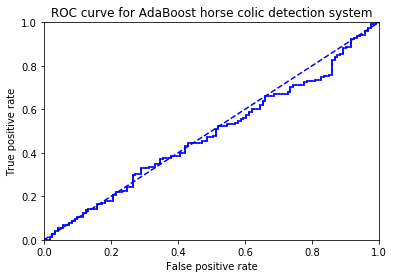

the Area Under the Curve is:  0.4834710743801639


In [102]:
plotROC(aggClassEst.T,labelArr)